In [1]:
import Ab as ab
import datetime as dt
import pandas as pd
sd = dt.datetime(2002,1,1)
ed = dt.datetime(2023,3,2)
# 1x leveraged nasdaq 100 etf
qqq = ab.StockData('QQQ')
qqq.get_data_from_yfinance('QQQ',sd,ed+dt.timedelta(days=1))

qld = ab.StockData('QLD')
qld.get_data_from_yfinance('QLD',sd,ed+dt.timedelta(days=1))

tqqq = ab.StockData('TQQQ')
tqqq.get_data_from_yfinance('TQQQ',sd,ed+dt.timedelta(days=1))

ticker = qqq

naa200r = ab.StockData('NAA200R')
naa200r.get_data_from_csv('data/NAA200R.csv')
naa200r.data.sort_index(inplace=True)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [2]:
naa200r_stg = ab.Threshold(signal_data = naa200r, indicator = 'SignalPrice', buy_threshold = 15, sell_threshold = 30)
naa200r_stg.run_strategy(ticker, sd, ed)


NameError: name 'ticker' is not defined

In [ ]:
naa200r_bt = ab.BackTest(sd,ed)
naa200r_bt.run_backtest(naa200r_stg, ticker)


     Buy Date            Sell Date Ticker     Quant  Buy Price  Sell Price  \
0  2010-03-11  2010-08-23 00:00:00   TQQQ  1.825094   0.547917    0.425729   
1  2010-09-02  2011-08-04 00:00:00   TQQQ  1.742795   0.445833    0.722708   
2  2011-08-29  2011-09-02 00:00:00   TQQQ  1.796124   0.701250    0.650417   
3  2011-09-07  2011-09-09 00:00:00   TQQQ  1.670142   0.699479    0.644375   
4  2011-09-13  2011-09-20 00:00:00   TQQQ  1.549648   0.694479    0.768125   
5  2011-10-10  2011-11-09 00:00:00   TQQQ  1.616051   0.736563    0.758438   
6  2011-11-11  2011-11-16 00:00:00   TQQQ  1.536495   0.797708    0.769479   
7  2011-11-30  2011-12-14 00:00:00   TQQQ  1.622136   0.728854    0.670417   
8  2011-12-15  2011-12-19 00:00:00   TQQQ  1.634839   0.665208    0.654896   
9  2011-12-20  2014-10-07 00:00:00   TQQQ  1.501568   0.713021    3.361250   
10 2014-10-21  2015-08-24 00:00:00   TQQQ  1.501940   3.360417    3.376250   
11 2015-09-08  2015-09-25 00:00:00   TQQQ  1.264570   4.010000  

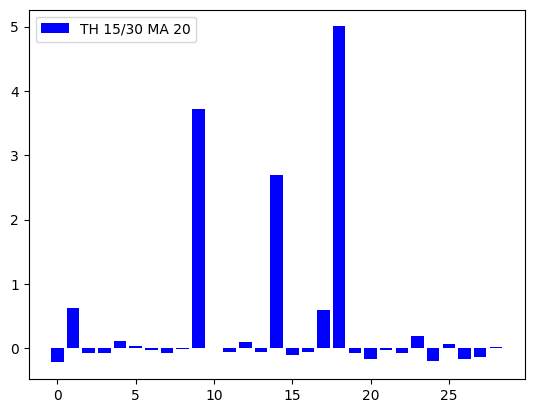

In [ ]:
import matplotlib.pyplot as plt
plt.bar(naa200r_bt.trade_records.index, naa200r_bt.trade_records['Profit %'], label = naa200r_bt.name ,color = 'blue')
plt.legend()
print(naa200r_bt.trade_records)

In [ ]:
naa200r_bt.performance_summary()


        
        Performance Summary of TH 15/30 MA 20: 
        cumulative return:9520.47%, 
        sharp_ratio: 6.00%, 
        max_drawdown: -59.61%, 
        average of daily return:0.1894%, 
        std of daily return: 3.1541%,
        number of trades: 31,
        trading days: 7730,
        annual return: 15.8318%

        
        
